## Image processing - filters

By going through this jupyter notebook and filling in the blanks you will learn how to apply different image processing filters to an image.

The example code and solutions were created by **André Lopes Marinho** and **Berit Zeller-Plumhoff**.

You will require the following libraries. If loading any of them fails, please use ``pip install`` to install any missing libraries.

In [73]:
# Importing libraries
import numpy as np
import math
import matplotlib.pyplot as plt
import imageio as iio
import skimage
from scipy.ndimage import gaussian_filter as scipy_gaussian_filter
from scipy.ndimage import median_filter as scipy_median_filter

---
### Loading relevant functions from the previous notebook

In [74]:
def load_and_show_image(path):
    """
    Load and display an image from the given path.

    Args:
        path (str): The path to the image file, including the file extension.
                    Example: "images/example.tif"

    Returns:
        numpy.ndarray: The image data as a NumPy array.
    """
    # Use imageio to read the image
    image = iio.imread(path)

    # Display the image in grayscale using matplotlib
    plt.imshow(image, cmap="gray")
    plt.show()  # Ensure the image is displayed

    # Print a success message
    print(f"The image from {path} was loaded successfully.")

    return image


def get_signal_to_noise_ratio(region_i, region_bg):
    """Calculates Signal-to-Noise Ratio (SNR) by the following expression:

                SNR = |mean(region_i)| / 0.5*[sqrt(stdev(region_i)^2 + stdev(region_bg)^2)]

    Args:
        region_i(numpy.ndarray): Array slice defining region i
        region_bg(numpy.ndarray): Array slice defining background region
    Returns:
        double: SNR value
    """

    # calculate the mean value of region_i
    a = np.mean(region_i)
    # calculate the denominator of the SNR
    b = 0.5 * math.sqrt(np.std(region_i) ** 2 + np.std(region_bg) ** 2)

    # compute and return the SNR
    SNR = a / b

    return SNR


def get_contrast_to_noise_ratio(region_i, region_j):
    """Calculates Contrast-to-Noise Ratio (CNR) by the following expression:

                CNR = |mean(region_i) - mean(region_j)| / 0.5*[sqrt(stdev(region_i)^2 + stdev(region_j)^2)]

    Args:
        region_i(numpy.ndarray): Array slice defining region i
        region_bg(numpy.ndarray): Array slice defining region j
    Returns:
        double: CNR value
    """

    # calculate the numerator of the CNR
    a = abs(np.mean(region_i) - np.mean(region_j))
    # calculate the denominator of the CNR
    b = 0.5 * math.sqrt(np.std(region_i) ** 2 + np.std(region_j) ** 2)

    # compute and return the CNR
    CNR = a / b

    return CNR

---
### Load and display the image used for the exercise

Load and display image ``08_soil_and_roots_8bit_2.png`` using ``load_and_show_image()`` function you defined in the previous exercise.

---
#### Solution
_- solve the exercise beneath using markdown and/or code blocks -_

C:\Users\carst\AppData\Local\Temp\ipykernel_17192\381890969.py:13: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  image = iio.imread(path)


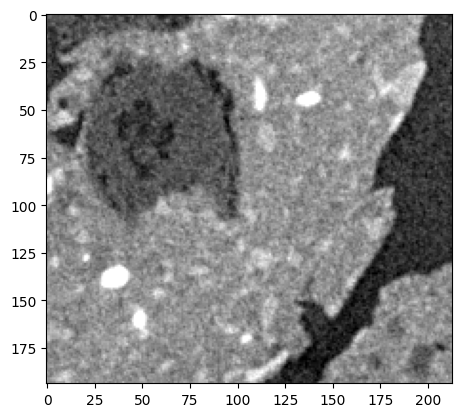

The image from data/08_soil_and_roots_8bit_2.png was loaded successfully.


In [75]:
# Ensure images display in the Jupyter notebook as static image, interactive widget or in a seperate window. [inline, widget, qt]
%matplotlib inline

# load the image used for the exercise and show it
image_raw = load_and_show_image(path="data/08_soil_and_roots_8bit_2.png")

---
### Image filters - Mean filter

If the image quality that we have determined is insufficient, e.g. if the **CNR is particularly low**, we can apply **filters to improve the noise level** while maintaining the sharpness of the features we are interested in.  
To do so, you will complete a function that defines a **mean filter** which is applied as a quadratic kernel template to the image. The function takes the original image and the filter kernel size as input and outputs the filtered image. You can move the template across the image in a scanning manner - in order to adjust for the edges correctly, you should apply a **zero padding at the image borders**.

---
#### Solution
_- solve the exercise beneath using markdown and/or code blocks -_

In [76]:
def mean_filter(image, filter_size):
    """Applies mean filter in a given image.

    Args:
        image(numpy.ndarray): Image to be filtered
        filter_size(int): Size of kernel
    Returns:
        numpy.ndarray: Filtered image
    """

    temp = []
    padding = filter_size // 2
    img_final = np.zeros((image.shape))

    img_aux = np.zeros((image.shape[0] + padding * 2, image.shape[1] + padding * 2))
    img_aux[padding:-padding, padding:-padding] = image.copy()

    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            temp = img_aux[i : i + filter_size, j : j + filter_size]
            img_final[i][j] = np.mean(temp)

    return img_final

Apply the filter to the image ``08_soil_and_roots_8bit_2.png`` with **different kernel sizes** and plot both the original and the filtered image next to each other.

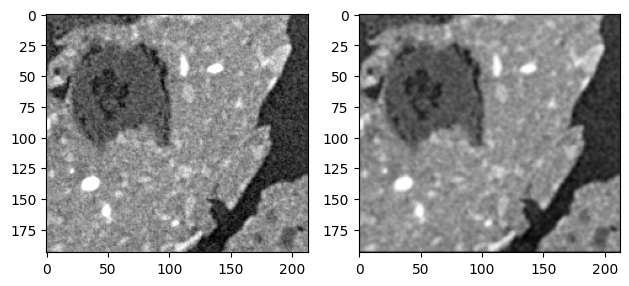

In [77]:
# Mean filter
img_mean = mean_filter(image_raw, 3)

# Plot your results to compare each one
fig, (ax1, ax2) = plt.subplots(1, 2)
ax1.imshow(image_raw, cmap="gray")
ax2.imshow(img_mean, cmap="gray")
fig.tight_layout()

**Finally**, compute the **CNR** for the same regions your defined on the image in the last exercise.

CNR soil vs. root after filtering:  10.07
CNR soil vs. air after filtering:  14.93
CNR air vs. root after filtering:  6.43


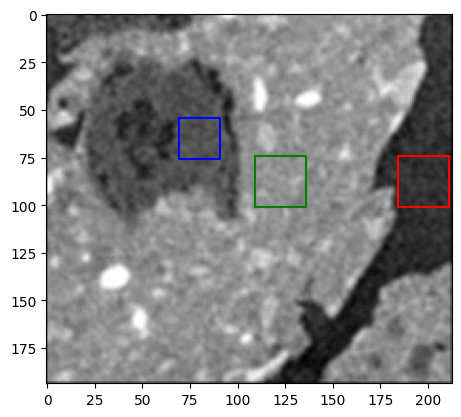

In [78]:
# Select different regions from the image and calculate SNR and CNR values

# Regions
air2 = img_mean[75:100, 185:210]
soil2 = img_mean[75:100, 110:135]
root2 = img_mean[55:75, 70:90]

# Visualizing them on the image

img_aux = img_mean.copy()

row_air, col_air = skimage.draw.rectangle_perimeter(start=(75, 185), end=(100, 210))
row_soil, col_soil = skimage.draw.rectangle_perimeter(start=(75, 110), end=(100, 135))
row_root, col_root = skimage.draw.rectangle_perimeter(start=(55, 70), end=(75, 90))

# For better vizualization

fig, ax = plt.subplots()
ax.imshow(img_aux, cmap="gray")
ax.plot(col_air, row_air, "-r")
ax.plot(col_soil, row_soil, "-g")
ax.plot(col_root, row_root, "-b")

# Calculate CNR

# CNR - Soil and Root
CNR1_mean = get_contrast_to_noise_ratio(soil2, root2)
print("CNR soil vs. root after filtering: ", np.round(CNR1_mean, 2))

# CNR - Soil and Air
CNR2_mean = get_contrast_to_noise_ratio(soil2, air2)
print("CNR soil vs. air after filtering: ", np.round(CNR2_mean, 2))

# CNR - Air and Root
CNR3_mean = get_contrast_to_noise_ratio(air2, root2)
print("CNR air vs. root after filtering: ", np.round(CNR3_mean, 2))

Comment on how a **mean filter with kernel size 3** has changed the **CNR** values:
- ...

---
### Image filters - Median filter

**In addition** to the mean filter, we are interested in using a **Median filter**. Write a function that will apply the respective filter and output the filtered image, given a certain input image and kernel size.

---
#### Solution
_- solve the exercise beneath using markdown and/or code blocks -_

In [79]:
def median_filter(image, filter_size):
    """Applies median filter in a given image.

    Args:
        image(numpy.ndarray): Image to be filtered
        filter_size(int): Size of kernel
    Returns:
        numpy.ndarray: Filtered image
    """

    temp = []
    padding = filter_size // 2
    img_final = np.zeros((image.shape))

    img_aux = np.zeros((image.shape[0] + padding * 2, image.shape[1] + padding * 2))
    img_aux[padding:-padding, padding:-padding] = image.copy()

    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            temp = img_aux[i : i + filter_size, j : j + filter_size]
            img_final[i][j] = np.median(temp)

    return img_final


Apply the filter to ``08_soil_and_roots_8bit_2.png`` using different filter parameters.

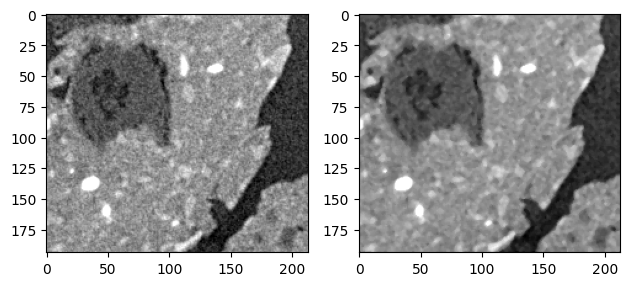

In [80]:
# median filter
image_median = median_filter(image_raw, 3)

# Plot your results to compare each one
fig, (ax1, ax2) = plt.subplots(1, 2)
ax1.imshow(image_raw, cmap="gray")
ax2.imshow(image_median, cmap="gray")
fig.tight_layout()

Comment on how the result changes by chaning the input settings.
- ...

---
### Image filters - Gaussian filter

We also like to apply a **Gaussian filter**. Write a function that will apply the respective filter and output the filtered image, given a certain input image and standard deviation $\sigma$.

**Hint:** You can use the `scipy.ndimage.filters.gaussian_filter` function for an easier implementation.

---
#### Solution
_- solve the exercise beneath using markdown and/or code blocks -_

We also like to apply a **Gaussian filter**. Write a function that will apply the respective filter and output the filtered image, given a certain input image and standard deviation $\sigma$.

**Hint:** You can use the `scipy.ndimage.filters.gaussian_filter` function for an easier implementation.

In [81]:
def gaussian_filter(image, filter_size, sigma):
    """Applies Gaussian filter to a given image.

    Args:
        image (numpy.ndarray): Image to be filtered
        filter_size(int): Size of kernel
        sigma (float): Standard deviation for Gaussian kernel

    Returns:
        numpy.ndarray: Filtered image
    """
    if not isinstance(image, np.ndarray):
        raise ValueError("Image must be a numpy.ndarray")
    if not isinstance(sigma, (int, float)) or sigma < 0:
        raise ValueError("Sigma must be a non-negative number")

    # Apply the Gaussian filter using SciPy's gaussian_filter function
    img_final = scipy_gaussian_filter(image, sigma=sigma, radius=filter_size // 2)

    return img_final

Apply the filter to ``08_soil_and_roots_8bit_2.png`` using different filter parameters.

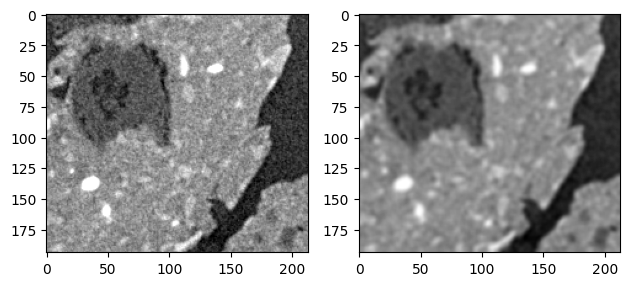

In [82]:
img_gauss = gaussian_filter(image_raw, filter_size=5, sigma=2)

# Plot your results to compare each one
fig, (ax1, ax2) = plt.subplots(1, 2)
ax1.imshow(image_raw, cmap="gray")
ax2.imshow(img_gauss, cmap="gray")
fig.tight_layout()

Comment on how the result changes by chaning the input settings.
- ...

---
### Image Filters - Fourier filter

**In addition** to the above filters, applying a **Fourier filter**, e.g. either a **high-, low- or a bandpass** filter can be very useful in order to highlight edges or smoothen the image. In the following, you should write three functions that will apply the different kinds of Fourier filters given an input image and the filter parameters.  
Start by loading and displaying ``08_soil_and_roots_8bit_2.png`` - we will be working with this image in the following.

---
#### Solution
_- solve the exercise beneath using markdown and/or code blocks -_

We will begin by applying a highpass filter - you will be required to use the image and the filter size as input to your function. Apply the **2D Fourier transform** from ``numpy`` to your image and shift the resulting spectrum to the center of the image. You should then create a circular mask based on the filter size that sets all low frequencies, i.e. those in the center of the Fourier spectrum, to zero. Then perform the inverse Fourier operations (shifting the spectrum back first).

Plot the **original image**, the **magnitude spectrum**, the **highpass filter mask** and the **image after filtering** next to each other.

#### High Pass Filter

In [83]:
def fft_highpass_filter(image, filter_size):
    """Applies highpass Fourier filter to a given image.

    Args:
        image(numpy.ndarray): Image to be filtered
        filter_size(numpy.ndarray): Number of frequency-equivalent pixels to remove

    Returns:
        numpy.ndarray: Filtered image
    """
    # use the numpy 2D Fourier function to transform the input image
    f = np.fft.fft2(image)

    # shift the spectrmu to the center
    fshift = np.fft.fftshift(f)
    magnitude_spectrum = 20 * np.log(np.abs(fshift))

    # draw a cylindrical mask using the filter size to filter out the low frequencies
    crow = fshift.shape[0] // 2
    ccol = fshift.shape[1] // 2
    rr, cc = skimage.draw.disk(
        center=(crow, ccol), radius=filter_size, shape=fshift.shape[0:2]
    )
    filter_img = np.ones((fshift.shape[0], fshift.shape[1]))
    filter_img[rr, cc] = 0
    fshift = fshift * filter_img

    # perform the inverse transform
    f_ishift = np.fft.ifftshift(fshift)
    img_back = np.fft.ifft2(f_ishift)
    img_back = np.abs(img_back)

    # Plot the original image, the magnitude spectrum, the highpass filter mask
    # and the image after filtering next to each other.
    plt.subplot(141), plt.imshow(image, cmap="gray")
    plt.title("Input image"), plt.xticks([]), plt.yticks([])
    plt.subplot(142), plt.imshow(magnitude_spectrum, cmap="gray")
    plt.title("Magnitude spectrum"), plt.xticks([]), plt.yticks([])
    plt.subplot(143), plt.imshow(filter_img, cmap="gray")
    plt.title("Highpass filter"), plt.xticks([]), plt.yticks([])
    plt.subplot(144), plt.imshow(img_back, cmap="gray")
    plt.title("Image after HPF"), plt.xticks([]), plt.yticks([])
    plt.tight_layout()
    plt.show()

    return img_back

Now use the function you have just defined on the image of the soil and root **with different input filter sizes** and comment on how the filter influences the image.

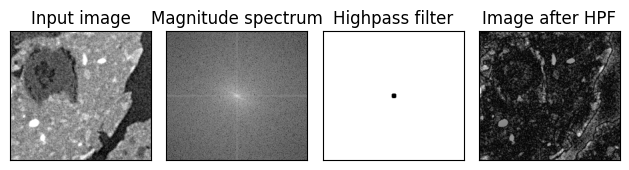

In [84]:
image_hpf = fft_highpass_filter(image_raw, 4)

#### Low Pass Filter

Next, define a function for a **low-pass Fourier filter**. Do the same as above, but maintain the low frequencies this time.

In [85]:
def fft_lowpass_filter(image, filter_size):
    """Applies lowpass Fourier filter to a given image.

    Args:
        image(numpy.ndarray): Image to be filtered
        filter_size(numpy.ndarray): Number of frequency-equivalent pixels to remove

    Returns:
        numpy.ndarray: Filtered image
    """
    f = np.fft.fft2(image)
    fshift = np.fft.fftshift(f)
    magnitude_spectrum = 20 * np.log(np.abs(fshift))

    crow = fshift.shape[0] // 2
    ccol = fshift.shape[1] // 2
    rr, cc = skimage.draw.disk(
        center=(crow, ccol), radius=filter_size, shape=fshift.shape[0:2]
    )
    filter_img = np.zeros((f.shape[0], f.shape[1]))
    filter_img[rr, cc] = 1
    fshift = fshift * filter_img
    f_ishift = np.fft.ifftshift(fshift)
    img_back = np.fft.ifft2(f_ishift)
    img_back = np.abs(img_back)

    plt.subplot(141), plt.imshow(image, cmap="gray")
    plt.title("Input image"), plt.xticks([]), plt.yticks([])
    plt.subplot(142), plt.imshow(magnitude_spectrum, cmap="gray")
    plt.title("Magnitude spectrum"), plt.xticks([]), plt.yticks([])
    plt.subplot(143), plt.imshow(filter_img, cmap="gray")
    plt.title("Lowpass filter"), plt.xticks([]), plt.yticks([])
    plt.subplot(144), plt.imshow(img_back, cmap="gray")
    plt.title("Image after LPF"), plt.xticks([]), plt.yticks([])
    plt.tight_layout()
    plt.show()

    return img_back

Apply the **low-pass filter** to the image of the soil and root for different input filter sizes and comment on how the image is changed.

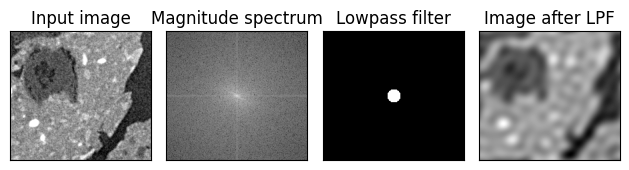

In [86]:
image_lpf = fft_lowpass_filter(image_raw, 10)

#### Band Pass Filter

Finally, define a **Fourier bandpass filter** which takes two filter sizes as input for low- and high-frequency thresholds, respectively.

In [87]:
def fft_bandpass_filter(image, filter_size1, filter_size2):
    """Applies bandpass fourier filter to a given image.

    Args:
        image(numpy.ndarray): Image to be filtered
        filter_size1(numpy.ndarray): Number of frequency-equivalent pixels to remove fp

    Returns:
        numpy.ndarray: Filtered image
    """
    f = np.fft.fft2(image)
    fshift = np.fft.fftshift(f)
    magnitude_spectrum = 20 * np.log(np.abs(fshift))

    crow = fshift.shape[0] // 2
    ccol = fshift.shape[1] // 2
    rr, cc = skimage.draw.disk(
        center=(crow, ccol), radius=filter_size2, shape=fshift.shape[0:2]
    )
    filter_img = np.zeros((f.shape[0], f.shape[1]))
    filter_img[rr, cc] = 1
    rr, cc = skimage.draw.disk(
        center=(crow, ccol), radius=filter_size1, shape=fshift.shape[0:2]
    )
    filter_img[rr, cc] = 0
    fshift = fshift * filter_img
    fshift = fshift * filter_img
    f_ishift = np.fft.ifftshift(fshift)
    img_back = np.fft.ifft2(f_ishift)
    img_back = np.abs(img_back)

    plt.subplot(141), plt.imshow(image, cmap="gray")
    plt.title("Input image"), plt.xticks([]), plt.yticks([])
    plt.subplot(142), plt.imshow(magnitude_spectrum, cmap="gray")
    plt.title("Magnitude spectrum"), plt.xticks([]), plt.yticks([])
    plt.subplot(143), plt.imshow(filter_img, cmap="gray")
    plt.title("Bandpass filter"), plt.xticks([]), plt.yticks([])
    plt.subplot(144), plt.imshow(img_back, cmap="gray")
    plt.title("Image after BPF"), plt.xticks([]), plt.yticks([])
    plt.tight_layout()
    plt.show()

    return img_back

Apply the **bandpass filter** to the image of the soil and root for different input filter sizes and comment on how the image is changed.

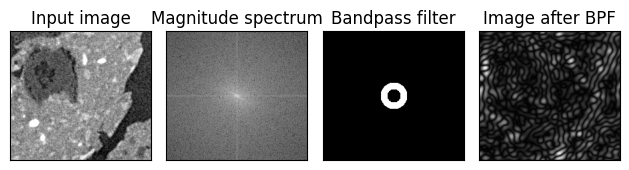

In [88]:
image_bpf = fft_bandpass_filter(image_raw, 10, 20)

---